In [1]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn import * 
import numpy as np 
import matplotlib.pyplot as plt 
from torchsummary import summary
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

In [2]:
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [39]:
model = EEGCNN(in_channels = 1, classes = 4)
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 25, 22, 976]             650
          Identity-2          [-1, 25, 22, 976]               0
            Conv2d-3           [-1, 25, 6, 976]           3,150
       BatchNorm2d-4           [-1, 25, 6, 976]              50
         MaxPool2d-5           [-1, 25, 6, 325]               0
            Conv2d-6           [-1, 50, 6, 301]          31,300
          Identity-7           [-1, 50, 6, 301]               0
            Conv2d-8           [-1, 70, 2, 287]         157,570
          Identity-9           [-1, 70, 2, 287]               0
        MaxPool2d-10            [-1, 70, 2, 95]               0
           Conv2d-11            [-1, 70, 1, 95]           9,870
        MaxPool2d-12            [-1, 70, 1, 31]               0
           Linear-13                    [-1, 4]           8,684
          Softmax-14                   

In [34]:
model = EEGCNN(1,4,activation='none').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 100,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.394676
0	1.384699	0.272911	1.382025	0.312057	
--Iter 49	1.361636
1	1.378807	0.338022	1.374186	0.338061	
--Iter 49	1.307160
2	1.358815	0.354616	1.348896	0.338061	
--Iter 49	1.376953
3	1.335940	0.371041	1.346940	0.354610	
--Iter 49	1.297454
4	1.332706	0.384013	1.341362	0.342790	
--Iter 49	1.289419
5	1.330236	0.372389	1.342537	0.354610	
--Iter 49	1.318709
6	1.325866	0.385866	1.339784	0.349882	
--Iter 49	1.364635
7	1.323028	0.389993	1.338024	0.359338	
--Iter 49	1.345552
8	1.322380	0.391257	1.340397	0.361702	
--Iter 49	1.334290
9	1.321303	0.389235	1.337466	0.364066	
--Iter 49	1.329317
10	1.319371	0.390330	1.336388	0.361702	
--Iter 49	1.285737
11	1.316739	0.393699	1.335561	0.364066	
--Iter 49	1.306007
12	1.315439	0.397911	1.334094	0.364066	
--Iter 49	1.282941
13	1.314181	0.395553	1.330037	0.368794	
--Iter 49	1.281350
14	1.308447	0.402796	1.321006	0.394799	
--Iter 49	1.299235
15	1.299174	0.426297	1.308381	0.387707	
-

KeyboardInterrupt: 

In [3]:
model = EEGCNNc2(in_channels = 1, classes = 4)
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 50, 22, 976]           1,300
          Identity-2          [-1, 50, 22, 976]               0
            Conv2d-3          [-1, 50, 10, 976]           7,550
       BatchNorm2d-4          [-1, 50, 10, 976]             100
            Conv2d-5          [-1, 80, 10, 952]         100,080
       BatchNorm2d-6          [-1, 80, 10, 952]             160
          Identity-7          [-1, 80, 10, 952]               0
         MaxPool2d-8          [-1, 80, 10, 476]               0
            Linear-9              [-1, 476, 40]          32,040
         Identity-10              [-1, 476, 40]               0
        AvgPool2d-11               [-1, 62, 40]               0
           Linear-12                    [-1, 4]           9,924
          Softmax-13                    [-1, 4]               0
Total params: 151,154
Trainable params:

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.375816
0	1.387553	0.272490	1.375603	0.302600	
--Iter 49	1.312636
1	1.351679	0.348214	1.383480	0.276596	
--Iter 49	1.325610
2	1.339107	0.372810	1.344042	0.373522	
--Iter 49	1.250252
3	1.307082	0.414757	1.318395	0.401891	
--Iter 49	1.256395
4	1.293061	0.426550	1.315865	0.368794	
--Iter 49	1.224592
5	1.258504	0.487113	1.293536	0.420804	
--Iter 49	1.180048
6	1.233064	0.535714	1.267250	0.479905	
--Iter 49	1.217440
7	1.208831	0.552139	1.259006	0.482270	
--Iter 49	1.178719
8	1.209109	0.543379	1.255812	0.482270	
--Iter 49	1.122250
9	1.172039	0.612281	1.213523	0.546099	
--Iter 49	1.231492
10	1.150578	0.636961	1.216585	0.513002	
--Iter 49	1.191237
11	1.137238	0.647827	1.195195	0.586288	
--Iter 49	1.117786
12	1.125924	0.651701	1.189397	0.579196	
--Iter 49	1.187981
13	1.124454	0.656587	1.211439	0.522459	
--Iter 49	1.048476
14	1.104388	0.683373	1.184147	0.569740	
--Iter 49	1.055194
15	1.084114	0.720350	1.176208	0.581560	
-

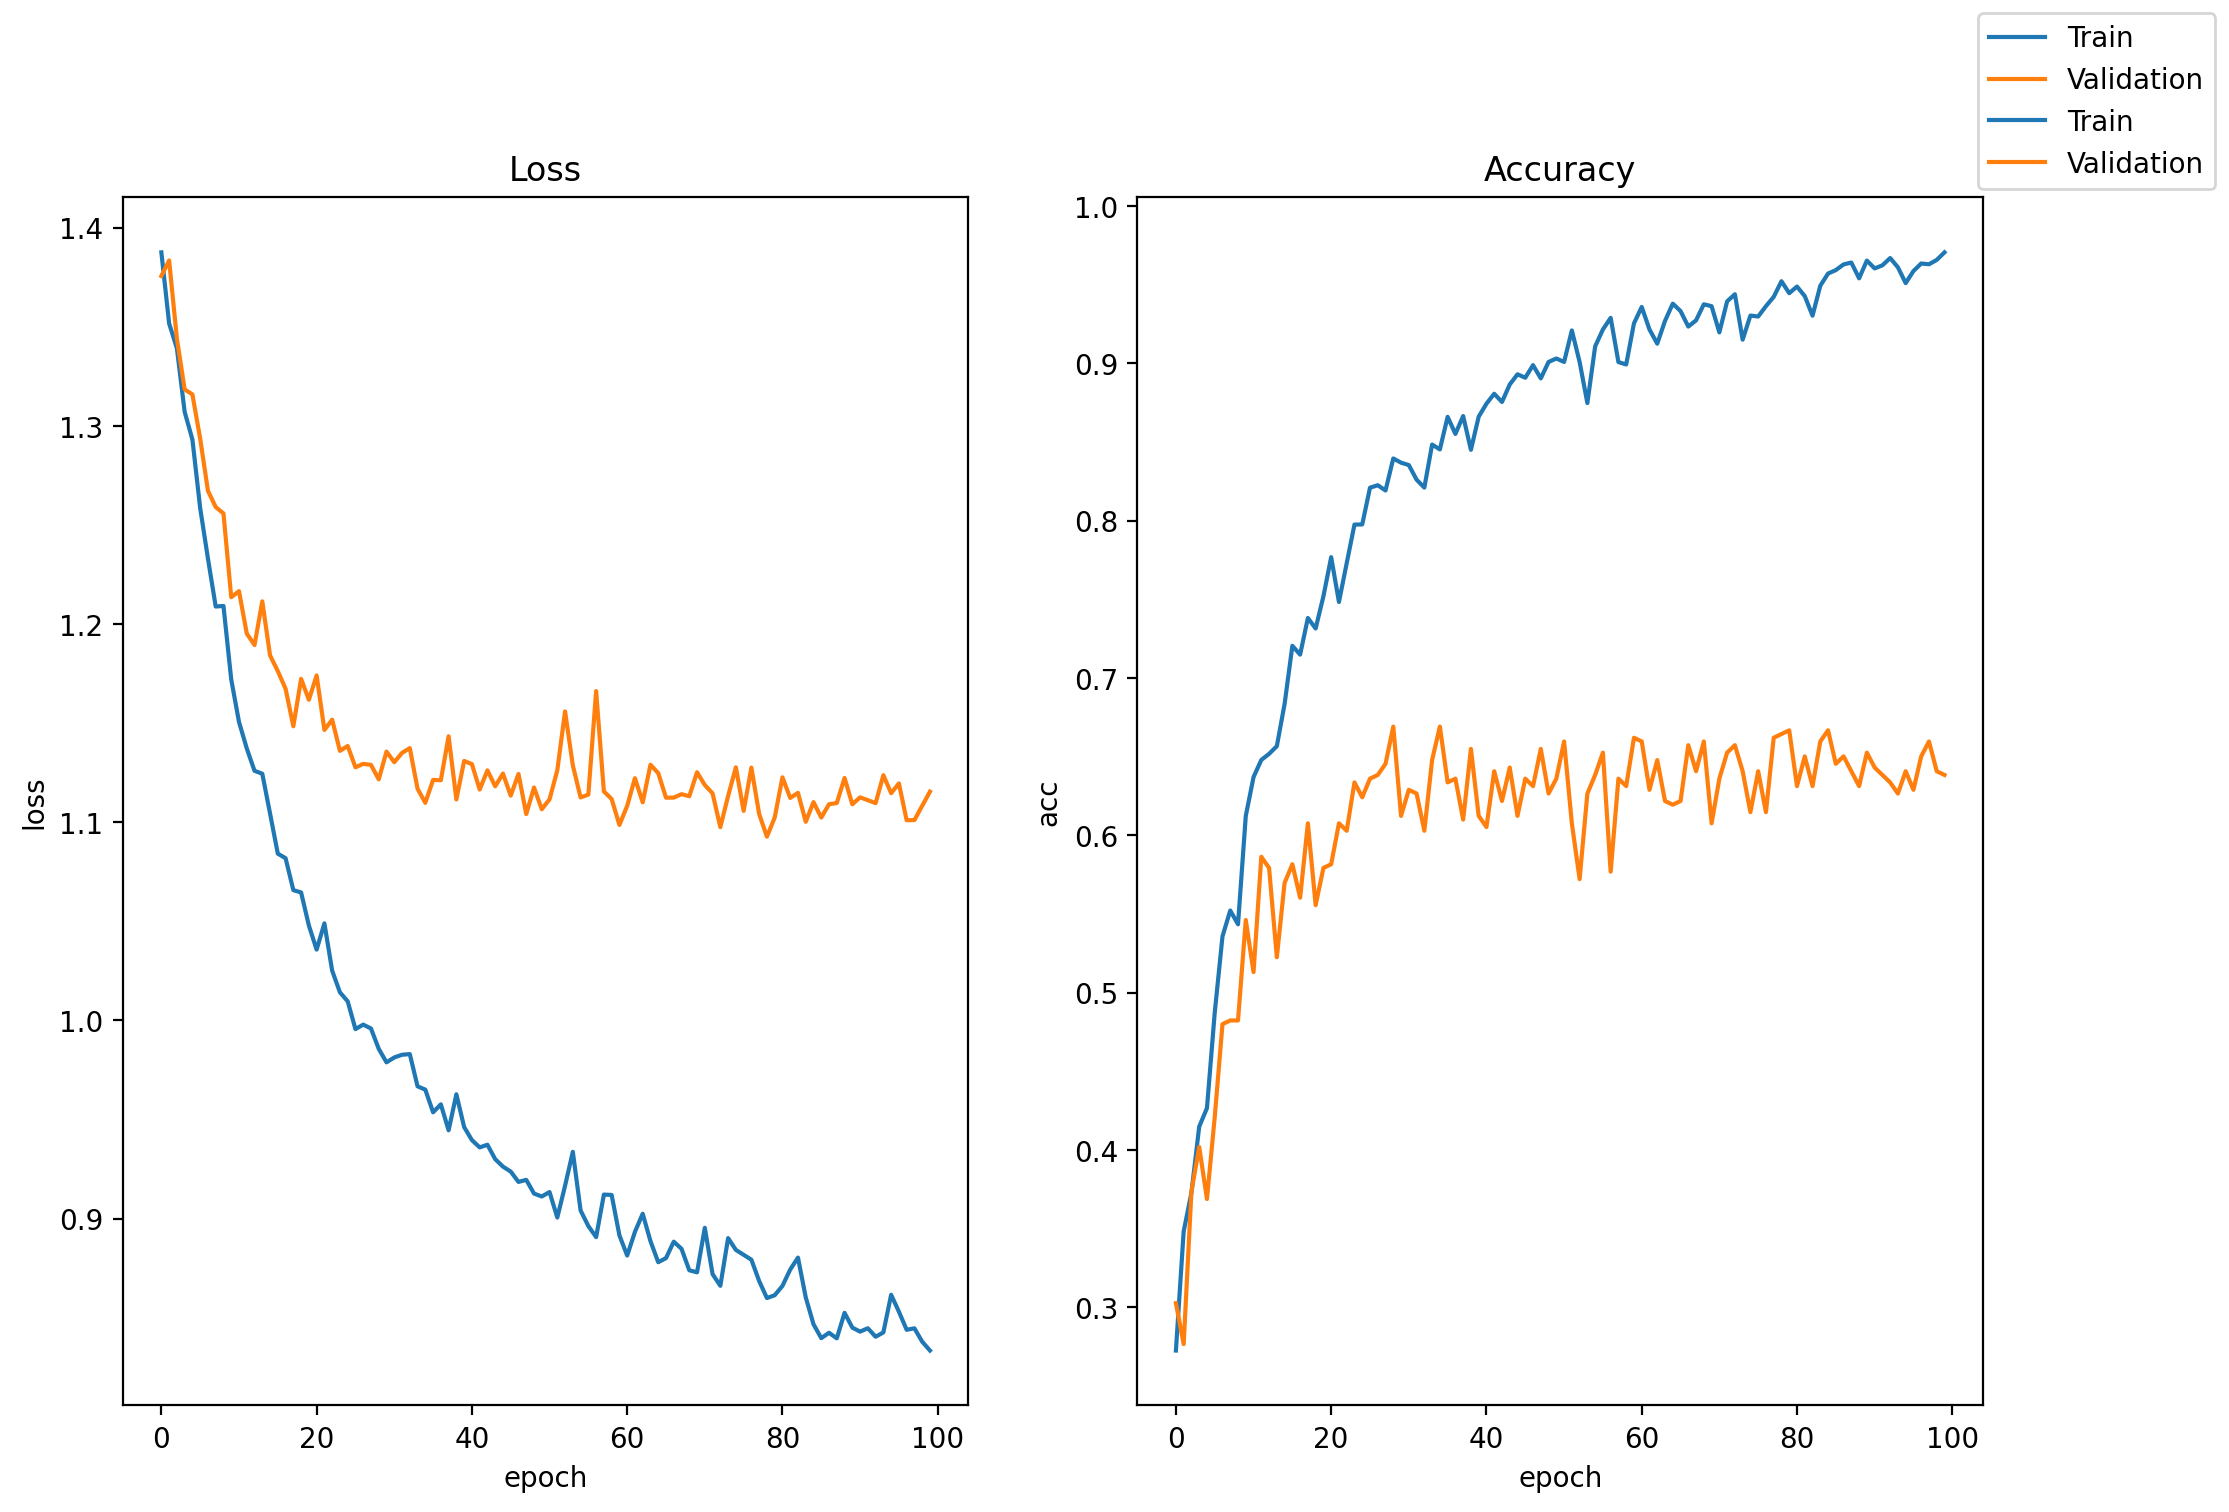

In [92]:
model = EEGCNNc2(1,4,activation='elu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 100,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

In [8]:
model = EEGCNNc3(in_channels = 1, classes = 4)
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 40, 22, 976]           1,040
          Identity-2          [-1, 40, 22, 976]               0
            Conv2d-3          [-1, 40, 10, 976]           4,840
       BatchNorm2d-4          [-1, 40, 10, 976]              80
          Identity-5          [-1, 40, 10, 976]               0
         MaxPool2d-6          [-1, 40, 10, 488]               0
            Conv2d-7         [-1, 32, 484, 396]             832
       BatchNorm2d-8         [-1, 32, 484, 396]              64
          Identity-9         [-1, 32, 484, 396]               0
        AvgPool2d-10           [-1, 32, 96, 79]               0
           Conv2d-11           [-1, 64, 94, 77]          18,496
      BatchNorm2d-12           [-1, 64, 94, 77]             128
         Identity-13           [-1, 64, 94, 77]               0
        AvgPool2d-14           [-1, 64,

## EEGCNN3 1 layer fc 

## EEGCNN3 (suqare avgpool log)

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.362395
0	1.382756	0.261203	1.378581	0.300236	
--Iter 49	1.357252
1	1.370665	0.316712	1.373280	0.302600	
--Iter 49	1.337763
2	1.355928	0.356469	1.369625	0.314421	
--Iter 49	1.335678
3	1.341963	0.371546	1.367875	0.321513	
--Iter 49	1.358525
4	1.329185	0.400775	1.357589	0.338061	
--Iter 49	1.326530
5	1.318152	0.406334	1.353319	0.340426	
--Iter 49	1.335969
6	1.307845	0.420906	1.345771	0.342790	
--Iter 49	1.298336
7	1.298804	0.428740	1.346086	0.330969	
--Iter 49	1.247235
8	1.293547	0.432193	1.340082	0.352246	
--Iter 49	1.253180
9	1.289093	0.448450	1.332200	0.352246	
--Iter 49	1.327482
10	1.280380	0.463443	1.327924	0.366430	
--Iter 49	1.235587
11	1.275051	0.478858	1.327808	0.380615	
--Iter 49	1.246359
12	1.265739	0.490313	1.311138	0.432624	
--Iter 49	1.174868
13	1.248824	0.523080	1.291060	0.463357	
--Iter 49	1.207403
14	1.232389	0.537736	1.283470	0.446809	
--Iter 49	1.153376
15	1.212680	0.574798	1.257059	0.508274	
-

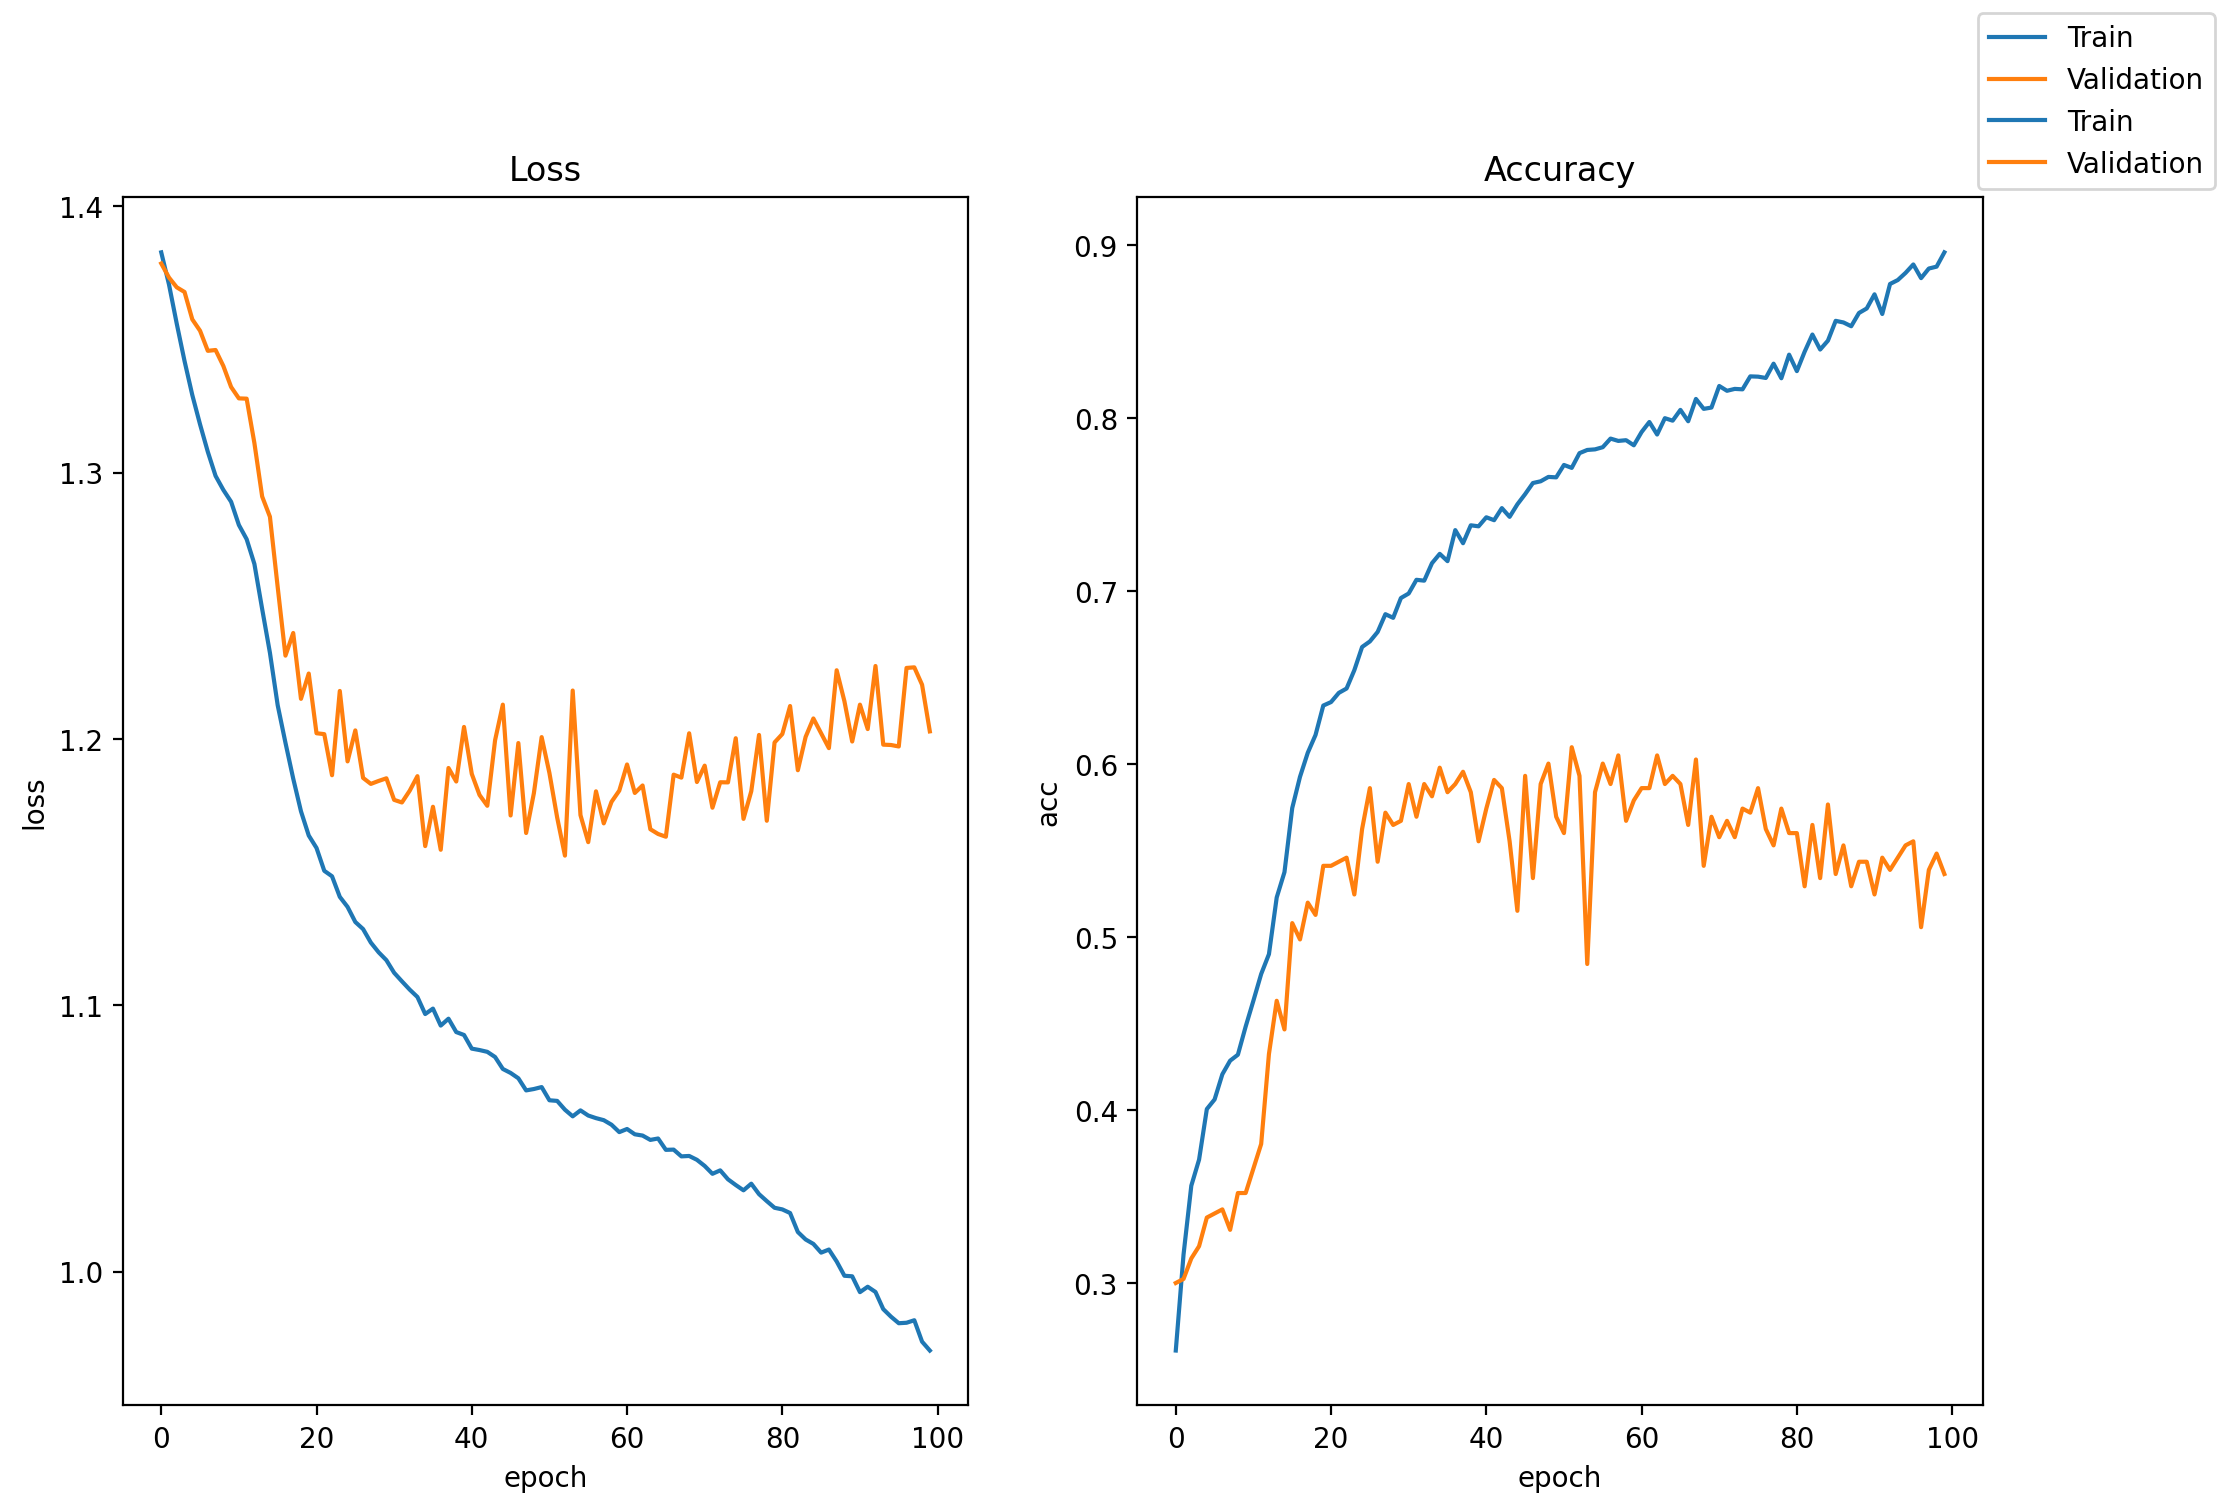

In [10]:
model = EEGCNNc3(1,4,activation='leaky_relu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 100,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)


In [13]:
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

The maximum of the validation is: 0.6099290780141844


## EEGCNN3 (no suqare avgpool log)

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.359053
0	1.384262	0.275522	1.378051	0.274232	
--Iter 49	1.375854
1	1.370270	0.311658	1.368178	0.333333	
--Iter 49	1.373299
2	1.355151	0.340044	1.363759	0.330969	
--Iter 49	1.348201
3	1.344187	0.365398	1.358536	0.321513	
--Iter 49	1.367455
4	1.335809	0.371799	1.353549	0.342790	
--Iter 49	1.331296
5	1.333571	0.376937	1.341350	0.345154	
--Iter 49	1.235145
6	1.324331	0.398501	1.327817	0.359338	
--Iter 49	1.284582
7	1.319224	0.426129	1.329198	0.368794	
--Iter 49	1.272764
8	1.314836	0.411978	1.325766	0.390071	
--Iter 49	1.347869
9	1.306639	0.420654	1.319934	0.382979	
--Iter 49	1.335564
10	1.304981	0.421833	1.315486	0.390071	
--Iter 49	1.252095
11	1.296218	0.445586	1.313095	0.399527	
--Iter 49	1.209955
12	1.292889	0.444491	1.305119	0.399527	
--Iter 49	1.280339
13	1.284382	0.464370	1.297538	0.439716	
--Iter 49	1.269073
14	1.271997	0.482059	1.264169	0.439716	
--Iter 49	1.275751
15	1.252730	0.516678	1.253386	0.484634	
-

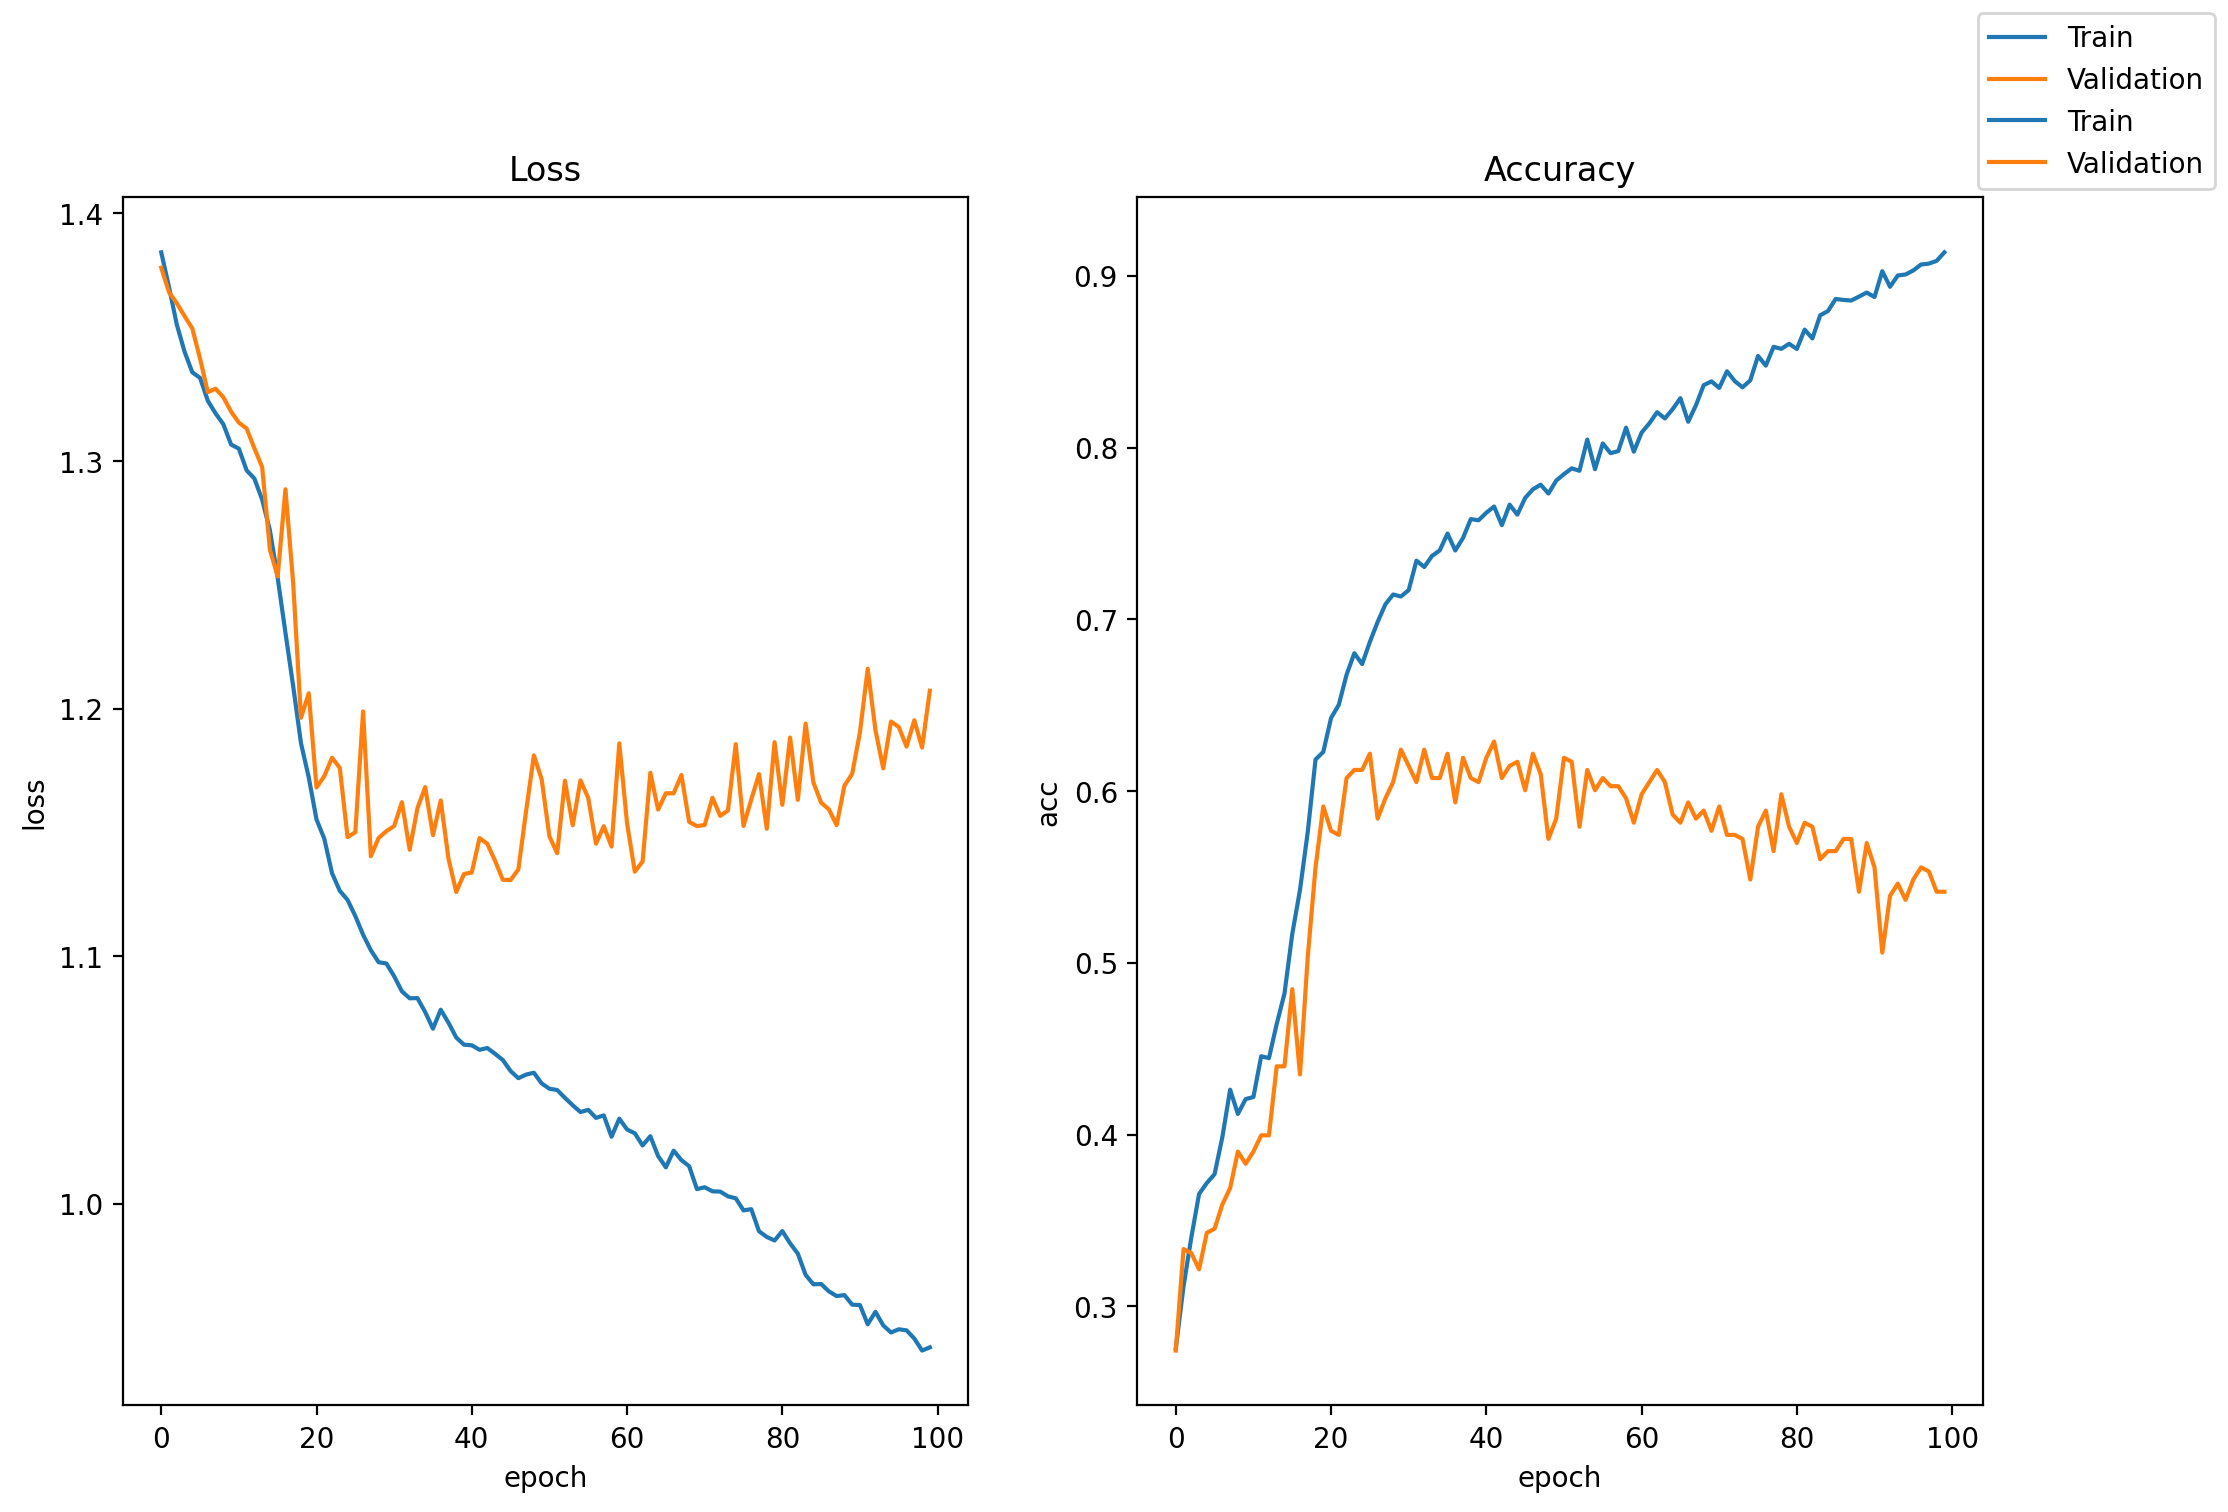

The maximum of the validation is: 0.6288416075650118


In [14]:
model = EEGCNNc3(1,4,activation='leaky_relu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 100,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

## EEGCNN3 (maxpool)

## EEGCNN3 (maxpool with square and log)

In [93]:
model = ShallowConv(1,4)
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 40, 22, 976]           1,040
            Linear-2              [-1, 976, 40]          35,240
          Identity-3              [-1, 976, 40]               0
         AvgPool1d-4               [-1, 40, 61]               0
            Linear-5                    [-1, 4]           9,764
           Softmax-6                    [-1, 4]               0
Total params: 46,044
Trainable params: 46,044
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.08
Forward/backward pass size (MB): 7.17
Params size (MB): 0.18
Estimated Total Size (MB): 7.43
----------------------------------------------------------------
